In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
from datetime import datetime,timedelta

In [96]:
df = pd.read_csv('C:/Users/HP/Downloads/archive/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [97]:
names =  ['date','passengers']
df.columns = names

In [98]:
df.head()

,date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        144 non-null    object
 1   passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [100]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [101]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

In [102]:
df.head(2)

,passengers
date,
1949-01-01,112
1949-02-01,118


<Axes: xlabel='date'>

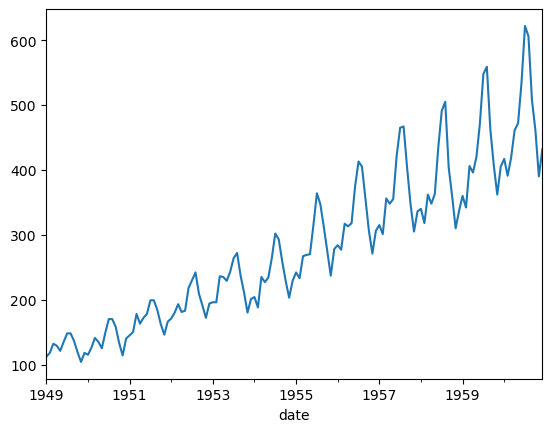

In [103]:
df['passengers'].plot()
# here we get seasonal data which looks not staionary

In [104]:
# now need  dkfuller test to know whether stationary or not
from statsmodels.tsa.stattools import adfuller

In [105]:
def adtest(series):
    result = adfuller(series)
    print('P-value : {}'.format(result[0]))
    if result[1]<=0.05 :
        print('data is  stationary')
    else:
        print('our data is not stationary')
adtest(df['passengers'])        

P-value : 0.8153688792060457
our data is not stationary


In [106]:
# here we use differencing technique to make data stationary
# shift(n) where n means number of rows to be shifted 
df['first difference'] = df['passengers'] - df['passengers'].shift(1)

In [107]:
# using adtest again to check if data is stationary now  
adtest(df['first difference'].dropna())
# still not stationary

P-value : -2.8292668241699963
our data is not stationary


In [108]:
# second differencing 
df['2 difference'] = df['first difference'] - df['first difference'].shift(1)
adtest(df['2 difference'].dropna())
# now the data became stationary 

P-value : -16.384231542468502
data is  stationary


<Axes: xlabel='date'>

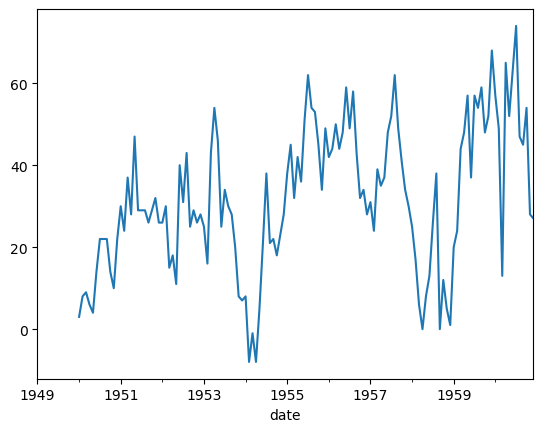

In [109]:
# but we know that this is seasonal data so need to calculate differencing for 12 shifts to get stationary real values
df['12 difference'] = df['passengers'] - df['passengers'].shift(12)
df['12 difference'].plot()

In [110]:
# performing adtest again to check if stationry
adtest(df['12 difference'].dropna())
# now it is stationary

P-value : -3.3830207264924814
data is  stationary


In [111]:
# now time to plot pacf anf acf for getting p and q values we got d value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

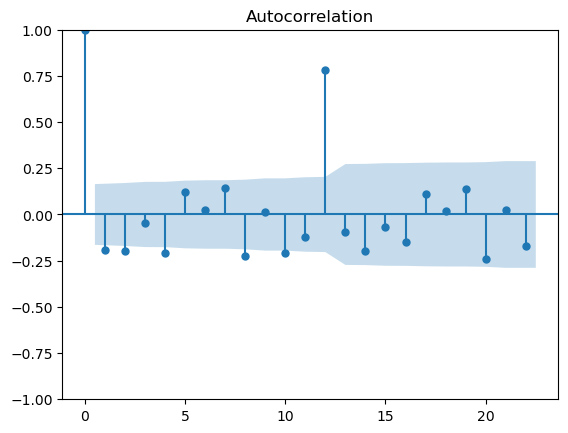

In [112]:
# for 2 differencing 
acf2 = plot_acf(df['2 difference'].dropna())  #q=12 as 12 has high impact

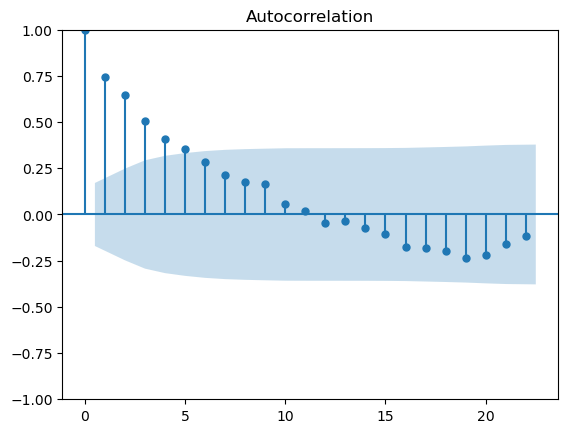

In [113]:
# for 12 differencing as we have seasonal data
acf12 = plot_acf(df['12 difference'].dropna()) #we have q = 5

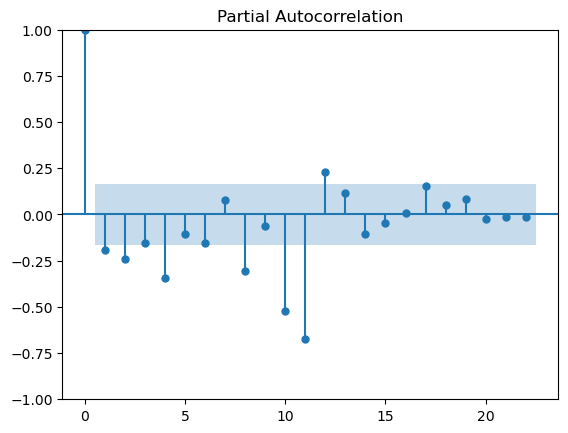

In [114]:
###finding p value using pacf
pacf2 = plot_pacf(df['2 difference'].dropna())  #p value 1,2,4,8,10

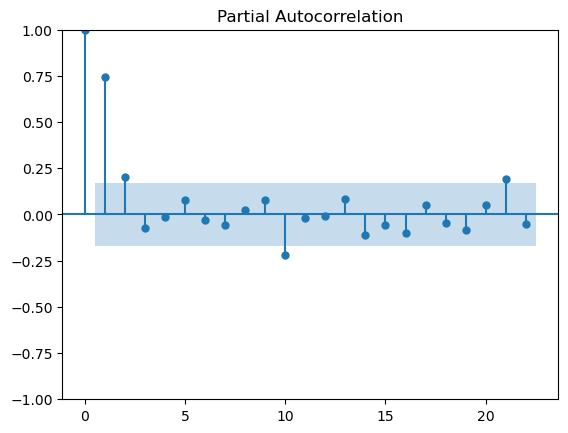

In [115]:
# for 12 differencing p value is 
pacf12 = plot_pacf(df['12 difference'].dropna()) #p = 2,10

In [116]:
# dividing data into train test split
train_end = datetime(1955,1,1)
test_end = datetime(1960,12,1)

In [117]:
# here i faced problem while slicing coz index was not correctly assigned as date ,so check if index is date column
train_dataset = df.loc[:train_end]
test_dataset = df.loc[train_end + timedelta(days = 1):test_end]

In [118]:
train_dataset

,passengers,first difference,2 difference,12 difference
date,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1954-09-01,259,-34.0,-25.0,22.0
1954-10-01,229,-30.0,4.0,18.0
1954-11-01,203,-26.0,4.0,23.0


In [119]:
test_dataset

,passengers,first difference,2 difference,12 difference
date,,,,
1955-02-01,233,-9.0,-22.0,45.0
1955-03-01,267,34.0,43.0,32.0
1955-04-01,269,2.0,-32.0,42.0
1955-05-01,270,1.0,-1.0,36.0
1955-06-01,315,45.0,44.0,51.0
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [120]:
pred_start = test_dataset.index[0]
pred_end = test_dataset.index[-1]

In [126]:
from statsmodels.tsa.arima.model import ARIMA

In [197]:
model_arima2 = ARIMA(train_dataset['passengers'],order=(10,2,12)) # arima(data , order = (p,d,q))

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [198]:
fit_model = model_arima2.fit()

D:\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [199]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                   73
Model:               ARIMA(10, 2, 12)   Log Likelihood                -265.834
Date:                Mon, 20 Nov 2023   AIC                            577.667
Time:                        14:43:01   BIC                            629.709
Sample:                    01-01-1949   HQIC                           598.363
                         - 01-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1019      0.143      0.711      0.477      -0.179       0.383
ar.L2         -1.0531      0.141     -7.477      0.000      -1.329      -0.777
ar.L3          0.1341      0.154      0.868      0.385      -0.169       0.437
ar.L4         -1.0987      0.157     -6.984      0.000      -1.407      -0.790
ar.L5          0.1835      0.214      0.858      0.391      -0.236       0.603
ar.L6         -1.0459      0.220     -4.748      0.000      -1.478      -0.614
ar.L7          0.1059      0.176      0.602      0.547      -0.239       0.451
ar.L8         -1.0531      0.137     -7.690      0.000      -1.321      -0.785
ar.L9          0.0702      0.131      0.536      0.592      -0.187       0.327
ar.L10        -0.9410      0.112     -8.385      0.000      -1.161      -0.721
ma.L1         -1.3691      3.411     -0.401      0.688      -8.054       5.316
ma.L2          1.2670      1.490      0.850      0.395      -1.654       4.188
ma.L3         -1.3625      3.125     -0.436      0.663      -7.488       4.763
ma.L4          1.8152      1.887      0.962      0.336      -1.883       5.514
ma.L5         -1.9722      4.776     -0.413      0.680     -11.333       7.389
ma.L6          1.6008      2.275      0.704      0.482      -2.858       6.060
ma.L7         -1.5453      3.213     -0.481      0.631      -7.842       4.752
ma.L8          1.5568      2.294      0.679      0.497      -2.939       6.052
ma.L9         -1.4283      3.472     -0.411      0.681      -8.234       5.378
ma.L10         1.0084      1.827      0.552      0.581      -2.573       4.589
ma.L11        -0.8891      2.098     -0.424      0.672      -5.001       3.223
ma.L12         0.3222      1.048      0.307      0.758      -1.731       2.376
sigma2        72.1365    235.223      0.307      0.759    -388.892     533.165
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.50
Prob(Q):                              0.92   Prob(JB):                         0.06
Heteroskedasticity (H):               2.95   Skew:                             0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [200]:
pred = fit_model.predict(start = pred_start,end = pred_end)

In [201]:
pred

1955-02-01    218.569144
1955-03-01    243.085484
1955-04-01    253.856863
1955-05-01    263.287858
1955-06-01    289.652884
                 ...    
1960-08-01    418.570835
1960-09-01    400.146763
1960-10-01    380.594420
1960-11-01    363.634417
1960-12-01    358.893167
Freq: MS, Name: predicted_mean, Length: 71, dtype: float64

In [202]:
residuals = test_dataset['passengers'] - pred

In [203]:
residuals

date
1955-02-01     14.430856
1955-03-01     23.914516
1955-04-01     15.143137
1955-05-01      6.712142
1955-06-01     25.347116
                 ...    
1960-08-01    187.429165
1960-09-01    107.853237
1960-10-01     80.405580
1960-11-01     26.365583
1960-12-01     73.106833
Length: 71, dtype: float64

<Axes: ylabel='Density'>

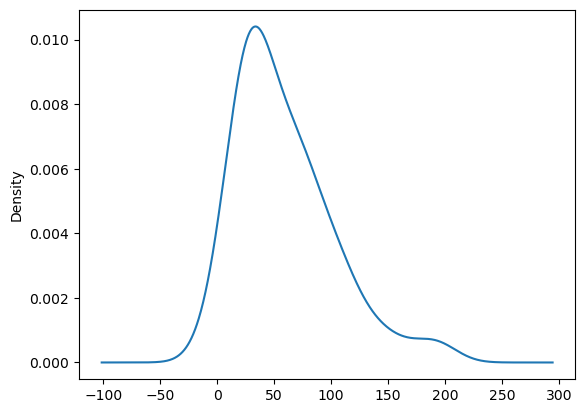

In [204]:
residuals.plot(kind='kde')

In [205]:
test_dataset['pred'] = pred

C:\Users\HP\AppData\Local\Temp\ipykernel_4660\1541962814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['pred'] = pred


<Axes: xlabel='date'>

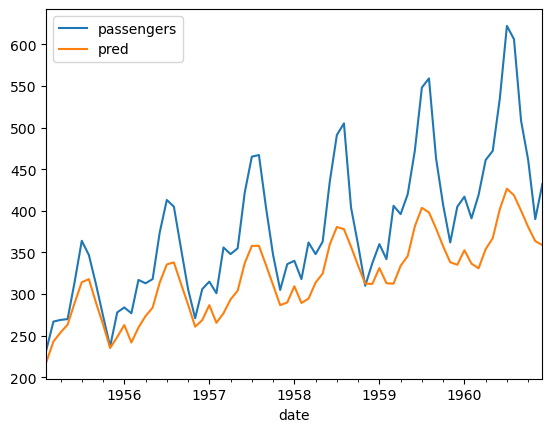

In [206]:
test_dataset[['passengers','pred']].plot()